# Este experimento consta de:
- Láser
- Polarizador a 45
- Biprisma
- Retardador
- Polarizador a 45
- Cámara

In [1]:
%load_ext autoreload
%autoreload 2

from py_lab.sources import Source
from py_lab.camera import Camera
from py_lab.motor import Motor
from py_lab.daca import DACA
from PIL import Image
import numpy as np
import time

## Laser

In [2]:
source = Source(name="PIC_CTL_PD")

In [3]:
source.Open()

In [23]:
source.Set_Power(600)

In [33]:
source.Close()

## Camara

In [5]:
cam = Camera(name="uEye_LCD", M=1, wavelength=None)

Background cleared


In [6]:
cam.Open()

Gain must be between 1 and  8.52


In [7]:
cam.Set_Property_Auto(name="Exposure", value=0)
cam.Set_Property(name="Exposure", value=5)
cam.Set_Property(name="Framerate", value=3)
cam.Set_Property_Auto(name="Resolution", value=0)
cam.Set_Property(name="Resolution", value=[3840 , 2748])

Background cleared
Background cleared
Property Resolution cannot be automatically handled by uEye_LCD
The value of the property resolution is [3840 2748].
Background cleared


In [8]:
cam.Set_Property(name="Gain", value=0)
cam.Set_Property(name="GainLinear", value=45)

Background cleared
Background cleared


In [9]:
cam.Start_Live(view=True)

In [10]:
cam.Close()

Exception in thread Thread-5 (show_in_window):
Traceback (most recent call last):
  File "d:\bitbucket\py_lab\py_lab\camera.py", line 519, in show_in_window
    im = self.Get_Image(wait_time=0,
  File "d:\bitbucket\py_lab\py_lab\camera.py", line 649, in Get_Image
    result = self._object.get_image()
  File "d:\bitbucket\py_lab\py_lab\drivers\cameras\uEye\uEye.py", line 245, in get_image
    check(ueye.is_InquireImageMem(self.cam, self.pcImageMemory, self.MemID, self.width, self.height, self.nBitsPerPixel, self.pitch))
  File "d:\bitbucket\py_lab\py_lab\drivers\cameras\uEye\uEye.py", line 128, in check
    raise uEyeException(error_code)
py_lab.drivers.cameras.uEye.uEye.uEyeException: 	Invalid camera handle. Most of the uEye SDK functions expect the camera handle as the first parameter.	

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Program Files\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.ru

## Motor

In [10]:
motor = Motor(name="InteliDrivesSingle")

In [11]:
motor.Open()

In [12]:
motor.Home()

## Toma de imágenes

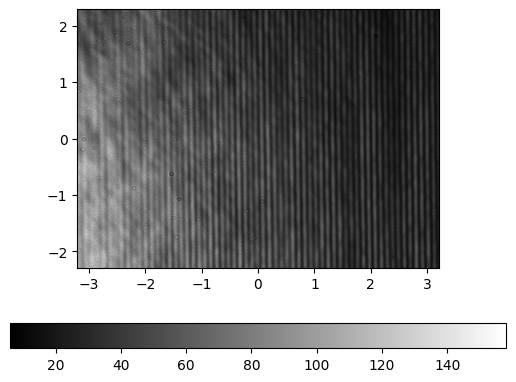

In [85]:
imagen = cam.Get_Image(draw=True)
image_PIL = Image.fromarray(imagen) 
image_PIL.convert("L").save("biprisma_sin_telescopio.png")
np.savez('biprisma_sin_telescopio.npz', nombre_variable=imagen)

## Añadimos el telescopio

In [25]:
cam.Get_Property("Resolution", verbose=True)

The value of the property Resolution is [1280 1024].


array([1280, 1024])

In [28]:
cam.Set_Property(name="Resolution", value=[3840 , 2748])

The value of the property resolution is [3840 2748].
Background cleared


In [27]:
print(cam.resolution)

[3840 2748]


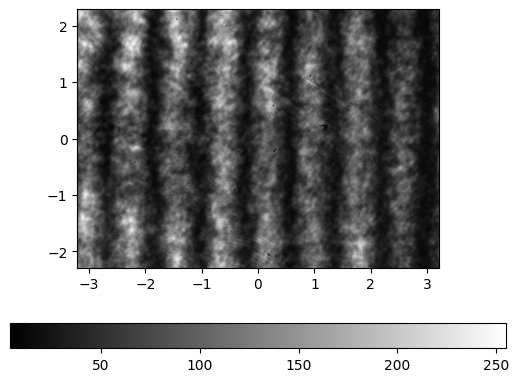

In [31]:
imagen = cam.Get_Image(draw=True)
image_PIL = Image.fromarray(imagen) 
image_PIL.convert("L").save("biprisma_telescopio.png")
np.savez('biprisma_telescopio.npz', nombre_variable=imagen)

## Añadimos el motor

A continuación tomaremos una imagen cuando el motor está en el home, la cual usaremos como imagen de referencia y rotaremos el motor de grado en grado tomando imágenes, las cuales compararemos posteriormente con esta imagen de referencia.

In [25]:
p0 = motor.Home()

In [26]:
motor.Get_Position(units='deg', refered=True, verbose=True)

0.0

In [27]:
N = 361
angulos = np.linspace(0, 360, N)
I = np.zeros((N, cam.resolution[0]))
datos=[]
for i, ang in enumerate(angulos):
    new_pos = motor.Move_Relative(dist=1, units='deg', verbose=True, busy = True)
    time.sleep(1.1)
    angulos[i] = motor.Get_Position(units='deg', refered=True, verbose=True)
    imagen = cam.Get_Image(draw=False)
    imagen = np.mean(imagen, axis = 0)
    I[i,:] = imagen
    
np.savez('retardador_datos.npz', intensidades = I, angulos=angulos)

180.0 1
0.9999 1
180.0 1
180.0 1 position is 1.008 deg
0.9999 1
180.0 1
180.0 1 position is 2.025 deg
0.9999 1
180.0 1
180.0 1 position is 2.997 deg
0.9999 1
180.0 1
180.0 1 position is 4.014 deg
0.9999 1
180.0 1
180.0 1 position is 5.004 deg
0.9999 1
180.0 1
180.0 1 position is 6.021 deg
0.9999 1
180.0 1
180.0 1 position is 7.002 deg
0.9999 1
180.0 1
180.0 1 position is 8.001 deg99999999 deg
0.9999 1
180.0 1
180.0 1 position is 9.017999999999999 deg
0.9999 1
180.0 1
180.0 1 position is 9.999 deg
0.9999 1
180.0 1
180.0 1 position is 11.033999999999999 deg
0.9999 1
180.0 1
180.0 1 position is 11.997 deg99999999 deg
0.9999 1
180.0 1
180.0 1 position is 13.004999999999999 deg
0.9999 1
180.0 1
180.0 1 position is 13.995 deg
0.9999 1
180.0 1
180.0 1 position is 15.003 deg99999999 deg
0.9999 1
180.0 1
180.0 1 position is 15.993 deg
0.9999 1
180.0 1
180.0 1 position is 16.992 deg
0.9999 1
180.0 1
180.0 1 position is 17.991 deg
0.9999 1
180.0 1
180.0 1 position is 18.999 deg
0.9999 1
180.0 1
1